In [95]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import preprocessing
import hvplot.pandas

%matplotlib inline

In [96]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [105]:
#Reading the .csv files

fb_csv = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_csv)
fb_df['Date'] = pd.to_datetime(fb_df.Date).dt.date

aapl_csv = Path("../Resources/aapl_data.csv")
aapl_df = pd.read_csv(aapl_csv)
aapl_df['Date'] = pd.to_datetime(aapl_df.Date).dt.date

amzn_csv = Path("../Resources/amzn_data.csv")
amzn_df = pd.read_csv(amzn_csv)
amzn_df['Date'] = pd.to_datetime(amzn_df.Date).dt.date

nflx_csv = Path("../Resources/nflx_data.csv")
nflx_df = pd.read_csv(nflx_csv)
nflx_df['Date'] = pd.to_datetime(nflx_df.Date).dt.date

googl_csv = Path("../Resources/googl_data.csv")
googl_df = pd.read_csv(googl_csv)
googl_df['Date'] = pd.to_datetime(googl_df.Date).dt.date

fb_df.set_index("Date", inplace = True)
aapl_df.set_index("Date", inplace = True)
amzn_df.set_index("Date", inplace = True)
nflx_df.set_index("Date", inplace = True)
googl_df.set_index("Date", inplace = True)

In [106]:
fb_df = fb_df.drop(columns=["Open", "High", "Low"])

In [107]:
fb_df_scaled = fb_df
fb_df_scaled

,Close,Volume,Volatility,sentiment,RSI
Date,,,,,
2019-01-02,135.4100,25465924,0.286522,-0.025997,NaN
2019-01-03,131.8902,18011900,0.088181,-0.057317,NaN
2019-01-04,137.9400,23927539,0.164677,0.083206,NaN
2019-01-07,138.2300,16261533,0.021965,-0.016295,NaN
2019-01-08,142.5843,22239823,0.104831,0.039262,NaN
...,...,...,...,...,...
2019-12-24,205.1500,3999834,0.007783,0.181846,62.401246
2019-12-26,207.7900,7525951,0.029816,0.206155,66.392920
2019-12-27,208.1000,8717172,0.008426,0.119855,66.838128


In [108]:
#fb_df["new_col"] = fb_df.Close.shift(1)
#fb_df

In [109]:

x = fb_df_scaled.Close.values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
fb_df_scaled["Close0_1"] = x_scaled
fb_df_scaled

x = fb_df_scaled.Volume.values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
fb_df_scaled["Volume"] = x_scaled
fb_df_scaled

x = fb_df_scaled.sentiment.values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
fb_df_scaled["sentiment"] = x_scaled
fb_df_scaled

x = fb_df_scaled.RSI.values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
fb_df_scaled["RSI"] = x_scaled
fb_df_scaled

,Close,Volume,Volatility,sentiment,RSI,Close0_1
Date,,,,,,
2019-01-02,135.4100,0.323081,0.286522,0.241300,NaN,0.046186
2019-01-03,131.8902,0.210892,0.088181,0.151863,NaN,0.000000
2019-01-04,137.9400,0.299927,0.164677,0.553137,NaN,0.079383
2019-01-07,138.2300,0.184548,0.021965,0.269004,NaN,0.083189
2019-01-08,142.5843,0.274525,0.104831,0.427653,NaN,0.140324
...,...,...,...,...,...,...
2019-12-24,205.1500,0.000000,0.007783,0.834811,0.665566,0.961291
2019-12-26,207.7900,0.053071,0.029816,0.904228,0.742273,0.995932
2019-12-27,208.1000,0.070999,0.008426,0.657791,0.750828,1.000000


In [110]:
fb_df_scaled.dropna(inplace=True)
fb_df_scaled

,Close,Volume,Volatility,sentiment,RSI,Close0_1
Date,,,,,,
2019-01-23,144.0700,0.219933,0.137177,0.303129,0.692431,0.159819
2019-01-24,145.7400,0.227439,0.036593,0.268474,0.730141,0.181733
2019-01-25,149.0944,0.208480,0.050271,0.495600,0.799193,0.225748
2019-01-28,147.3700,0.129004,0.014710,0.277552,0.726008,0.203121
2019-01-29,144.1150,0.181153,0.111537,0.464559,0.599524,0.160410
...,...,...,...,...,...,...
2019-12-24,205.1500,0.000000,0.007783,0.834811,0.665566,0.961291
2019-12-26,207.7900,0.053071,0.029816,0.904228,0.742273,0.995932
2019-12-27,208.1000,0.070999,0.008426,0.657791,0.750828,1.000000


In [111]:
fb_df_scaled["Feature"] = fb_df_scaled.Close0_1 * fb_df_scaled.Volume * fb_df_scaled.Volatility * fb_df_scaled.sentiment * fb_df.RSI

In [119]:
fb_df_scaled#.iloc[:,6]

,Close,Volume,Volatility,sentiment,RSI,Close0_1,Feature
Date,,,,,,,
2019-01-23,144.0700,0.219933,0.137177,0.303129,0.692431,0.159819,0.001012
2019-01-24,145.7400,0.227439,0.036593,0.268474,0.730141,0.181733,0.000296
2019-01-25,149.0944,0.208480,0.050271,0.495600,0.799193,0.225748,0.000937
2019-01-28,147.3700,0.129004,0.014710,0.277552,0.726008,0.203121,0.000078
2019-01-29,144.1150,0.181153,0.111537,0.464559,0.599524,0.160410,0.000903
...,...,...,...,...,...,...,...
2019-12-24,205.1500,0.000000,0.007783,0.834811,0.665566,0.961291,0.000000
2019-12-26,207.7900,0.053071,0.029816,0.904228,0.742273,0.995932,0.001058
2019-12-27,208.1000,0.070999,0.008426,0.657791,0.750828,1.000000,0.000295


In [120]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [121]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 5

feature_column = 6
target_column = 0
X, y = window_data(fb_df_scaled, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[1.01205528e-03 2.96485808e-04 9.37109510e-04 7.76701910e-05
  9.02695113e-04]
 [2.96485808e-04 9.37109510e-04 7.76701910e-05 9.02695113e-04
  7.85314102e-03]
 [9.37109510e-04 7.76701910e-05 9.02695113e-04 7.85314102e-03
  4.04050418e-02]
 [7.76701910e-05 9.02695113e-04 7.85314102e-03 4.04050418e-02
  1.46726414e-05]
 [9.02695113e-04 7.85314102e-03 4.04050418e-02 1.46726414e-05
  5.86650956e-03]] 

y sample values:
[[150.3   ]
 [166.8   ]
 [165.83  ]
 [168.935 ]
 [170.9434]]


In [122]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [123]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [124]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[1.12735351e-02]
  [3.30262902e-03]
  [1.04386955e-02]
  [8.65187542e-04]
  [1.00553450e-02]]

 [[3.30262902e-03]
  [1.04386955e-02]
  [8.65187542e-04]
  [1.00553450e-02]
  [8.74780877e-02]]

 [[1.04386955e-02]
  [8.65187542e-04]
  [1.00553450e-02]
  [8.74780877e-02]
  [4.50081793e-01]]

 [[8.65187542e-04]
  [1.00553450e-02]
  [8.74780877e-02]
  [4.50081793e-01]
  [1.63442196e-04]]

 [[1.00553450e-02]
  [8.74780877e-02]
  [4.50081793e-01]
  [1.63442196e-04]
  [6.53485065e-02]]] 

X_test sample values:
[[[0.00053939]
  [0.00054873]
  [0.0021687 ]
  [0.00036127]
  [0.00593523]]

 [[0.00054873]
  [0.0021687 ]
  [0.00036127]
  [0.00593523]
  [0.01008989]]

 [[0.0021687 ]
  [0.00036127]
  [0.00593523]
  [0.01008989]
  [0.00350899]]

 [[0.00036127]
  [0.00593523]
  [0.01008989]
  [0.00350899]
  [0.02226346]]

 [[0.00593523]
  [0.01008989]
  [0.00350899]
  [0.02226346]
  [0.0052455 ]]]


In [125]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [126]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [127]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [128]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 5)              220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [129]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Train on 161 samples
Epoch 1/10
161/161 [==============================] - 5s 32ms/sample - loss: 0.0555
Epoch 2/10
161/161 [==============================] - 1s 8ms/sample - loss: 0.0587
Epoch 3/10
161/161 [==============================] - 1s 8ms/sample - loss: 0.0571
Epoch 4/10
161/161 [==============================] - 1s 8ms/sample - loss: 0.0545
Epoch 5/10
161/161 [==============================] - 1s 9ms/sample - loss: 0.0496
Epoch 6/10
161/161 [==============================] - 1s 9ms/sample - loss: 0.0505
Epoch 7/10
161/161 [==============================] - 1s 7ms/sample - loss: 0.0547
Epoch 8/10
161/161 [==============================] - 1s 8ms/sample - loss: 0.0549
Epoch 9/10
161/161 [==============================] - 1s 8ms/sample - loss: 0.0547
Epoch 10/10
161/161 [==============================] - 1s 8ms/sample - loss: 0.0543


In [130]:
# Evaluate the model
model.evaluate(X_test, y_test)

70/70 [==============================] - 1s 13ms/sample - loss: 0.0378


0.03776944960866656

In [131]:
# Make some predictions
predicted = model.predict(X_test)

In [132]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [133]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks.head()

,Real,Predicted
0,189.9000,185.351456
1,186.8500,185.352921
2,181.2906,185.355560
3,182.7800,185.358582
4,180.1600,185.365234


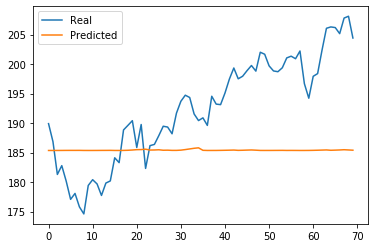

In [94]:
# Plot the real vs predicted prices as a line chart
stocks.plot()